<a href="https://colab.research.google.com/github/yadavroshankumar/Chatbot-for-university/blob/main/CSIT599_Module1_In_Class_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification with Single Layer and Multi-Layer Perceptrons
## Exercise for Students


This exercise demonstrates the difference between Single Layer Perceptron (SLP)
and Multi-Layer Perceptron (MLP) for handwritten digit classification.


Instructions:
1. Fill in the blanks marked with "# TODO: STUDENT FILL IN"
2. Run the code and compare the performance of both models
3. Experiment with different architectures and hyperparameters

In [10]:
"""
Instructions:
1. Fill in the blanks marked with "# TODO: STUDENT FILL IN"
2. Run the code and compare the performance of both models
3. Experiment with different architectures and hyperparameters
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# ============================================================================
# PART 1: DATA LOADING AND PREPROCESSING
# ============================================================================

def load_and_preprocess_data():
    """
    Load MNIST dataset and preprocess it for neural network training.

    Returns:
        tuple: (x_train, y_train, x_test, y_test) - preprocessed data
    """
    print("Loading MNIST dataset...")

    # Load the MNIST dataset (built into Keras)
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    print(f"Training data shape: {x_train.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Test data shape: {x_test.shape}")
    print(f"Test labels shape: {y_test.shape}")
    print(f"Number of classes: {len(np.unique(y_train))}")

    # TODO: STUDENT FILL IN
    # Normalize pixel values to range [0, 1] by dividing by 255.0
    x_train = x_train / 255.0
    x_test = x_test / 255.0

    # TODO: STUDENT FILL IN
    # Reshape images from 28x28 to 784 (flatten for perceptron input)
    # Hint: use reshape(-1, 28*28) where -1 means "infer this dimension"
    x_train = x_train.reshape(-1,28*28)
    x_test = x_test.reshape(-1,28*28)

    # Convert labels to categorical (one-hot encoding)
    # This converts integer labels (0-9) to binary vectors
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    print(f"After preprocessing:")
    print(f"Training data shape: {x_train.shape}")
    print(f"Training labels shape: {y_train.shape}")
    print(f"Pixel value range: [{x_train.min():.2f}, {x_train.max():.2f}]")

    return x_train, y_train, x_test, y_test

TensorFlow version: 2.19.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
# ============================================================================
# PART 2: SINGLE LAYER PERCEPTRON (SLP)
# ============================================================================

def create_single_layer_perceptron():
    """
    Create a Single Layer Perceptron model.

    A Single Layer Perceptron consists of:
    - Input layer (784 neurons for 28x28 flattened images)
    - Output layer (10 neurons for 10 digit classes)
    - No hidden layers!

    Returns:
        keras.Model: Compiled SLP model
    """
    print("\n" + "="*50)
    print("CREATING SINGLE LAYER PERCEPTRON")
    print("="*50)

    model = keras.Sequential(name="Single_Layer_Perceptron")

    # TODO: STUDENT FILL IN
    # Add a single Dense layer with 10 units (for 10 classes)
    # Use 'softmax' activation for multi-class classification
    # Specify input_shape=(784,) for the flattened 28x28 images
    model.add(layers.Dense(
        units=10,
        activation='softmax',
        input_shape=(784,),
        name='output_layer'
    ))

    # TODO: STUDENT FILL IN
    # Compile the model:
    # - optimizer: 'adam' (adaptive learning rate optimizer)
    # - loss: 'categorical_crossentropy' (for multi-class classification)
    # - metrics: ['accuracy'] to track accuracy during training
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Display model architecture
    print("\nSingle Layer Perceptron Architecture:")
    model.summary()

    return model



In [5]:
# ============================================================================
# PART 3: MULTI-LAYER PERCEPTRON (MLP)
# ============================================================================

def create_multi_layer_perceptron():
    """
    Create a Multi-Layer Perceptron model.

    A Multi-Layer Perceptron consists of:
    - Input layer (784 neurons)
    - Hidden layer(s) with non-linear activation
    - Output layer (10 neurons)

    Returns:
        keras.Model: Compiled MLP model
    """
    print("\n" + "="*50)
    print("CREATING MULTI-LAYER PERCEPTRON")
    print("="*50)

    model = keras.Sequential(name="Multi_Layer_Perceptron")

    # Hidden Layer 1
    # TODO: STUDENT FILL IN
    # Add first hidden layer with 128 units and 'relu' activation
    # Specify input_shape=(784,) for the first layer
    model.add(layers.Dense(
        units=128,
        activation='relu',
        input_shape=(784,),
        name='hidden_layer_1'
    ))

    # Hidden Layer 2
    # TODO: STUDENT FILL IN
    # Add second hidden layer with 64 units and 'relu' activation
    model.add(layers.Dense(
        units=64,
        activation='relu',
        name='hidden_layer_2'
    ))

    # Output Layer
    # TODO: STUDENT FILL IN
    # Add output layer with 10 units and 'softmax' activation
    model.add(layers.Dense(
        units=10,
        activation='softmax',
        name='output_layer'
    ))

    # TODO: STUDENT FILL IN
    # Compile the model with same parameters as SLP
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Display model architecture
    print("\nMulti-Layer Perceptron Architecture:")
    model.summary()

    return model



In [7]:
# ============================================================================
# PART 4: TRAINING AND EVALUATION FUNCTIONS
# ============================================================================

def train_model(model, x_train, y_train, x_test, y_test, epochs=10, batch_size=128):
    """
    Train a model and return training history.

    Args:
        model: Keras model to train
        x_train, y_train: Training data and labels
        x_test, y_test: Validation data and labels
        epochs: Number of training epochs
        batch_size: Training batch size

    Returns:
        keras.callbacks.History: Training history
    """
    print(f"\nTraining {model.name}...")
    print(f"Epochs: {epochs}, Batch size: {batch_size}")

    # Train the model
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, y_test),
        verbose=1  # Show progress bar
    )

    return history

def evaluate_model(model, x_test, y_test):
    """
    Evaluate model performance and display results.

    Args:
        model: Trained Keras model
        x_test, y_test: Test data and labels
    """
    print(f"\n" + "="*50)
    print(f"EVALUATING {model.name.upper()}")
    print("="*50)

    # Get test accuracy
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

    # Get predictions for detailed analysis
    y_pred = model.predict(x_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Classification report
    print(f"\nClassification Report for {model.name}:")
    print(classification_report(y_true_classes, y_pred_classes))

    return test_accuracy, y_pred_classes, y_true_classes

def plot_training_history(history_slp, history_mlp):
    """
    Plot training history comparison between SLP and MLP.

    Args:
        history_slp: Training history of Single Layer Perceptron
        history_mlp: Training history of Multi-Layer Perceptron
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Training accuracy
    ax1.plot(history_slp.history['accuracy'], label='SLP Train', marker='o')
    ax1.plot(history_mlp.history['accuracy'], label='MLP Train', marker='s')
    ax1.set_title('Training Accuracy Comparison')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Validation accuracy
    ax2.plot(history_slp.history['val_accuracy'], label='SLP Val', marker='o')
    ax2.plot(history_mlp.history['val_accuracy'], label='MLP Val', marker='s')
    ax2.set_title('Validation Accuracy Comparison')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    # Training loss
    ax3.plot(history_slp.history['loss'], label='SLP Train', marker='o')
    ax3.plot(history_mlp.history['loss'], label='MLP Train', marker='s')
    ax3.set_title('Training Loss Comparison')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('Loss')
    ax3.legend()
    ax3.grid(True)

    # Validation loss
    ax4.plot(history_slp.history['val_loss'], label='SLP Val', marker='o')
    ax4.plot(history_mlp.history['val_loss'], label='MLP Val', marker='s')
    ax4.set_title('Validation Loss Comparison')
    ax4.set_xlabel('Epoch')
    ax4.set_ylabel('Loss')
    ax4.legend()
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

def plot_confusion_matrices(y_true_slp, y_pred_slp, y_true_mlp, y_pred_mlp):
    """
    Plot confusion matrices for both models.

    Args:
        y_true_slp, y_pred_slp: True and predicted labels for SLP
        y_true_mlp, y_pred_mlp: True and predicted labels for MLP
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # SLP Confusion Matrix
    cm_slp = confusion_matrix(y_true_slp, y_pred_slp)
    sns.heatmap(cm_slp, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Single Layer Perceptron\nConfusion Matrix')
    ax1.set_xlabel('Predicted Label')
    ax1.set_ylabel('True Label')

    # MLP Confusion Matrix
    cm_mlp = confusion_matrix(y_true_mlp, y_pred_mlp)
    sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', ax=ax2)
    ax2.set_title('Multi-Layer Perceptron\nConfusion Matrix')
    ax2.set_xlabel('Predicted Label')
    ax2.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()



MNIST CLASSIFICATION: Single Layer vs Multi-Layer Perceptron
Loading MNIST dataset...
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10
After preprocessing:
Training data shape: (60000, 784)
Training labels shape: (60000, 10)
Pixel value range: [0.00, 1.00]

CREATING SINGLE LAYER PERCEPTRON


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Single Layer Perceptron Architecture:


Model: "Single_Layer_Perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)


CREATING MULTI-LAYER PERCEPTRON

Multi-Layer Perceptron Architecture:


Model: "Multi_Layer_Perceptron"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


TRAINING PHASE

Training Single_Layer_Perceptron...
Epochs: 15, Batch size: 128
Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7331 - loss: 1.0432 - val_accuracy: 0.9009 - val_loss: 0.3814
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8986 - loss: 0.3780 - val_accuracy: 0.9129 - val_loss: 0.3190
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9100 - loss: 0.3260 - val_accuracy: 0.9170 - val_loss: 0.2968
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9152 - loss: 0.3036 - val_accuracy: 0.9203 - val_loss: 0.2855
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9192 - loss: 0.2908 - val_accuracy: 0.9230 - val_loss: 0.2788
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9212 - loss: 0.2821 - val_accuracy: 0.9238 - val_loss: 0.2745
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9235 - loss: 0.2759 - val_accuracy: 0.9247 - val_loss: 0.2715
Epoch 8/15
469/469 ━━━━

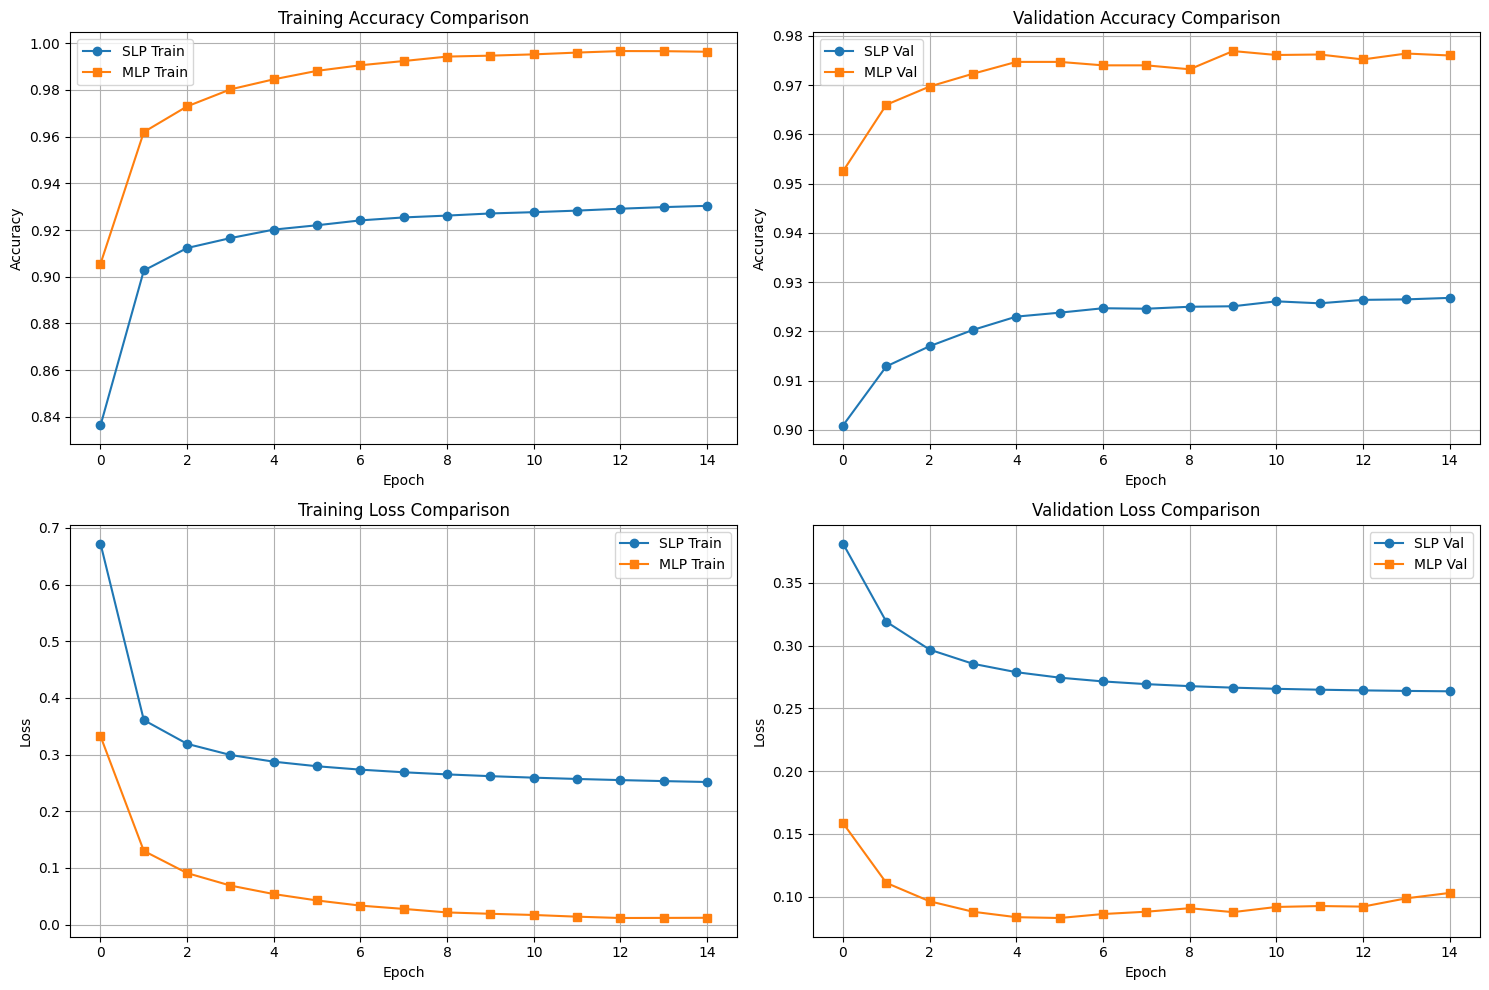

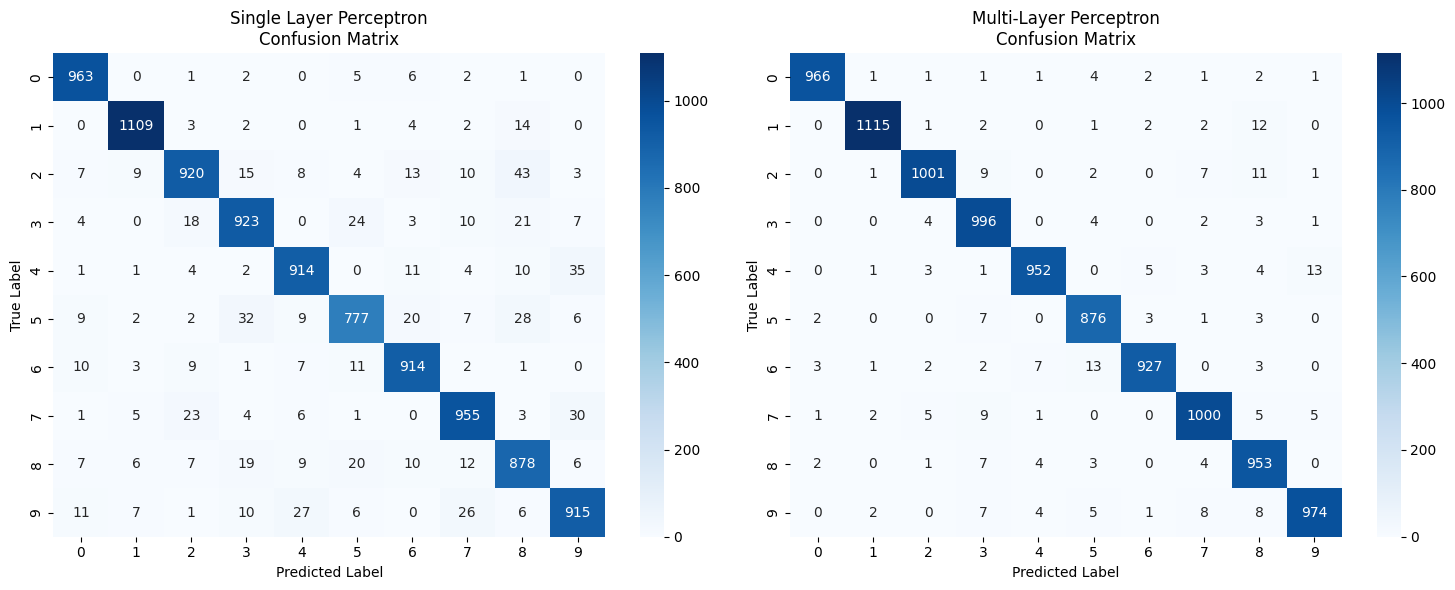


Model Complexity Comparison:
SLP Parameters: 7,850
MLP Parameters: 109,386


In [11]:
# ============================================================================
# PART 5: MAIN EXECUTION
# ============================================================================

def main():
    """
    Main function to run the complete experiment.
    """
    print("MNIST CLASSIFICATION: Single Layer vs Multi-Layer Perceptron")
    print("=" * 60)

    # Load and preprocess data
    x_train, y_train, x_test, y_test = load_and_preprocess_data()

    # Create models
    slp_model = create_single_layer_perceptron()
    mlp_model = create_multi_layer_perceptron()

    # Training parameters
    EPOCHS = 15
    BATCH_SIZE = 128

    # Train Single Layer Perceptron
    print(f"\n{'='*60}")
    print("TRAINING PHASE")
    print(f"{'='*60}")

    history_slp = train_model(slp_model, x_train, y_train, x_test, y_test,
                             epochs=EPOCHS, batch_size=BATCH_SIZE)

    # Train Multi-Layer Perceptron
    history_mlp = train_model(mlp_model, x_train, y_train, x_test, y_test,
                             epochs=EPOCHS, batch_size=BATCH_SIZE)

    # Evaluate models
    print(f"\n{'='*60}")
    print("EVALUATION PHASE")
    print(f"{'='*60}")

    acc_slp, pred_slp, true_slp = evaluate_model(slp_model, x_test, y_test)
    acc_mlp, pred_mlp, true_mlp = evaluate_model(mlp_model, x_test, y_test)

    # Compare results
    print(f"\n{'='*60}")
    print("FINAL COMPARISON")
    print(f"{'='*60}")
    print(f"Single Layer Perceptron Accuracy: {acc_slp:.4f} ({acc_slp*100:.2f}%)")
    print(f"Multi-Layer Perceptron Accuracy:  {acc_mlp:.4f} ({acc_mlp*100:.2f}%)")
    print(f"Improvement with MLP: {((acc_mlp - acc_slp)/acc_slp)*100:.2f}%")

    # Plot results
    plot_training_history(history_slp, history_mlp)
    plot_confusion_matrices(true_slp, pred_slp, true_mlp, pred_mlp)

    # Model parameters comparison
    print(f"\nModel Complexity Comparison:")
    print(f"SLP Parameters: {slp_model.count_params():,}")
    print(f"MLP Parameters: {mlp_model.count_params():,}")

if __name__ == "__main__":
    main()




## DISCUSSION QUESTIONS FOR STUDENTS:

1. Why does the Multi-Layer Perceptron perform better than the Single Layer Perceptron?

2. What is the role of the hidden layers in the MLP? Why can't the SLP achieve the same performance?

3. How does the number of parameters compare between the two models?
   Is more parameters always better?

4. What would happen if we used linear activation functions in the hidden layers of the MLP?

5. Experiment: Try different architectures (more/fewer hidden layers, different sizes).
   How does this affect performance?

6. What are the limitations of both approaches for more complex tasks?